# Lecture 7

## Singular Value Decomposition (SVD)

Loading 20NewsGroups:

In [17]:
from sklearn.datasets import fetch_20newsgroups


cats = ['sci.space', 'talk.politics.guns', 'comp.graphics', 'rec.autos', 'alt.atheism']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = True)
data = newsgroups_train.data

Creating tf-idf features:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vect = TfidfVectorizer(min_df =5, stop_words = 'english')
X = vect.fit_transform(data)
X.shape

(2797, 6497)

Running SVD, the function returns three composed matrix. Note, the function returns only the diagonal of sigma matrix (eigenvalues).

In [20]:
U, S, Vt = np.linalg.svd(X.todense())

Plotting eigenvalues:

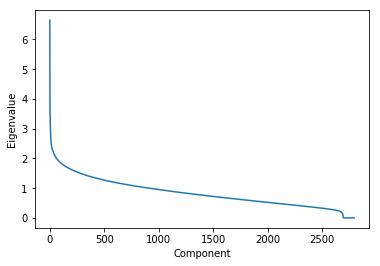

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.plot(S)

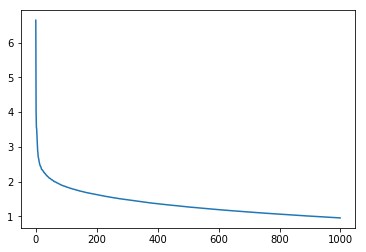

In [22]:
%matplotlib inline

plt.plot(S[:1000])

## Latent Dirichlet Allocation

Creating LDA to extract 10 topics:

In [71]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(10, learning_method = 'batch')
Z = lda.fit_transform(X)

In [72]:
Z.shape

(2797, 10)

Printing top features per topic:

In [74]:
vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lda.components_[i]).argsort()[::-1]
    print(vocab[order[:7]])

['building' 'mac' 'amendment' 'tear' 'concealed' 'fbi' 'qur']
['space' 'graphics' 'thanks' 'image' 'nasa' 'software' 'program']
['shafer' 'dryden' 'insisting' 'mary' 'balls' 'ames' 'seat']
['sphere' 'egalon' '68070' 'jmd' 'handheld' 'larc' 'points']
['3d' 'amiga' 'mac' 'hello' 'pov' 'animation' 'polygons']
['satan' 'god' 'freewill' 'kent' 'cheers' 'cruel' 'sensor']
['cview' 'militia' 'feustel' 'com' 'tek' 'sea' 'ico']
['just' 'don' 'people' 'like' 'car' 'think' 'know']
['god' 'islam' 'objective' 'morality' 'moral' 'belief' 'atheism']
['lh' 'valve' 'gear' 'stage' 'beautiful' 'douglas' 'shift']


## K-means clustering:

Plotting lower prentation of data (by using PCA):

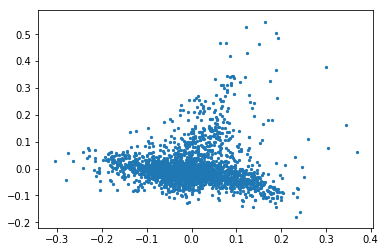

In [23]:
%matplotlib inline

from sklearn.decomposition import PCA

lsa = PCA(2)
Z = lsa.fit_transform(X.todense())

plt.scatter(Z[:, 0], Z[:, 1], 5)

Importing K-means:

In [26]:
from sklearn.cluster import KMeans
colors = np.array(['r', 'g', 'b'])

Running the clustering algorithm for 6 iterations and plotting the clusters:

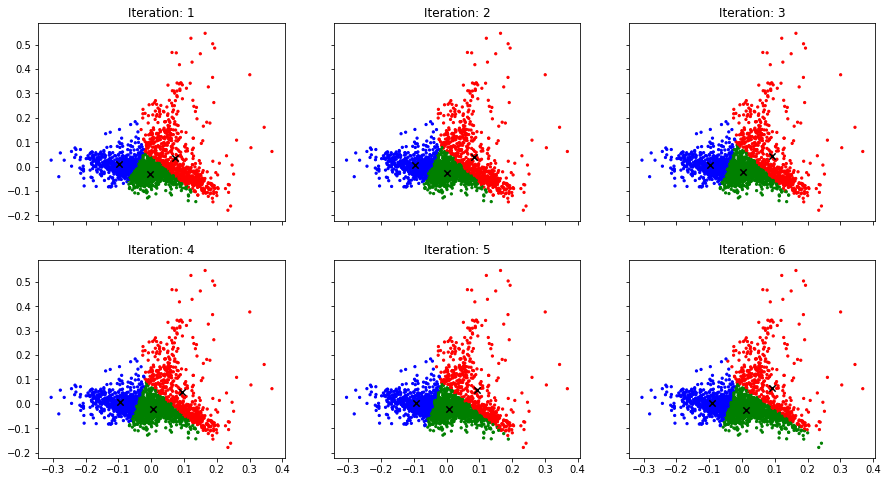

In [34]:
%matplotlib inline

f, axarr = plt.subplots(2, 3,  sharex='col', sharey='row', figsize = (15, 8))

for i in range(2):
    for j in range(3):
        max_iter = i * 3 + j + 1
        kmeans = KMeans(3, init = 'random', max_iter = max_iter, random_state = 10000, n_init = 1)
        clusters = kmeans.fit_predict(Z)
        axarr[i, j].scatter(Z[:, 0], Z[:, 1], 5, colors[clusters])
        axarr[i, j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 40, 'k', 'x')
        axarr[i, j].set_title("Iteration: %d" % max_iter)

## Extracting data from Twitter

** Not included in exam.

conda install pip

pip install TwitterAPI

In [7]:
from TwitterAPI import TwitterAPI
import csv, json

def create_twitter(oauth_file = 'oauth'):
    with open(oauth_file, 'rt') as csvfile:
        rdr = csv.DictReader(csvfile, delimiter=' ')
        creds = [r for r in rdr][0]
        api = TwitterAPI(creds['consumer_key'], creds['consumer_secret'], creds['access_token'], creds['access_token_secret'])
        return api


def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request; e.g., "friends/ids"
      params ..... A parameter dict for the request, e.g., to specify
                   parameters like screen_name or count.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
            time.sleep(61 * 15)


def get_tweets(twitter, query, count = 200):
    """Retrieve the Twitter user objects and search for tweets.
    Params:
        twitter........The TwitterAPI object.
        query...The search query
    Returns:
        A list of returned tweets.
    """
    tweets = []
    for i in range(0, count, 100):
        param = {'q': query, 'lang': 'en', 'count': 100}
        if i + 100 > count:
            param['count'] = count % 100
        if i > 0:
            param['max_id'] = max_id
        request = robust_request(twitter, 'search/tweets', param)
        js = request.json()
        meta_data = js['search_metadata']
        max_id = js['statuses'][-1]['id_str']
        tweets += js['statuses']
        #print(len(tweets))
    return tweets



In [15]:
twitter = create_twitter()

tweets = get_tweets(twitter, '#GoThere', 100)
with open('tweets.json', 'wt') as outfile:
    json.dump(tweets, outfile)


In [14]:
print(len(tweets))
print(tweets[0]['text'])

100
Hi RT=RT This PR, it’s a #humanity &amp; #Justice case #thaarjustice #RT #HRW #BBC #icymi #iraqilivesmatter #news… https://t.co/oQEhTYftEd
